In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, json, copy
import datetime

In [2]:
# useful function

def consommation(df, ts='#timestamp', w='#activepow1', total=False):
    """compute joule conversion on wattmetre output

    Args:
        df (pandas.DataFrame): wattmetre output dataframe
        total (bool, optional): print total. Defaults to False.

    Returns:
        [type]: [description]
    """
    integral_2_value = (df[w]*2)[:-1] + df[w].diff()[1:].tolist()
    diff_timestamp = df[ts].diff()[1:]
    diff_timestamp.index = range(len(diff_timestamp))
    
    df_j = pd.DataFrame({'ts': df[ts][1:].tolist(), 'j': diff_timestamp*integral_2_value/2})
    
    return sum(diff_timestamp*integral_2_value/2) if total else df_j
    
def get_value(power_metrics=None, metrics=None, debug=False):
    """travel across dictionary

    Args:
        power_metrics (dict): dictionnary. Defaults to None.
        metrics (list): keys way to get the target value. Defaults to None.
        debug (bool): print running step. Defaults to False.
        
    Returns:
        float: return the target value 
    """
    for metric in metrics:
        if debug:
            print(f'running on {metric}')
        if metric == 'pid':
            # if not exist then return error -> return 0
            try:
                power_metrics = sum(list(power_metrics.values()))
            except IndexError:
                print("no metrics on GPU found")
                power_metrics = 0
        elif metric == 'sm':
            power_metrics = sum(s.get('sm') for s in power_metrics)
        elif metric in power_metrics.keys(): 
            power_metrics = power_metrics.get(metric)
        else:
            return 0

    return power_metrics    

def integrate(date, watt, convert_date=True):
    """integrate x: date, y: watt

    Args:
        date (list): list of date
        watt (list): list of watt

    Raises:
        ValueError: [description]

    Returns:
        float: estimated joule metric
    """
    v = []
    if len(date) != len(watt):
        raise ValueError('not the same length')
    for i in range(len(watt)-1):
        x1 = datetime.datetime.fromisoformat(date[i]).timestamp() if convert_date else date[i]
        x2 = datetime.datetime.fromisoformat(date[i+1]).timestamp() if convert_date else date[i+1]
        y1 = watt[i]
        y2 = watt[i+1]
        v.append((x2-x1)*(y2+y1)/2)
    return v


## 1. Preprocessing

In [3]:
path='output_folder/power_metrics_50_it_EE64.json'
with open(path, 'r') as f:
    metrics_EE = [json.loads(line) for line in f]
path='output_folder/power_metrics_50_it64.json'
with open(path, 'r') as f:
    metrics = [json.loads(line) for line in f]
path='output_folder/power_metrics_50_it_EE128.json'
with open(path, 'r') as f:
    metrics_EE1 = [json.loads(line) for line in f]

In [4]:
intel_power_watt_EE = [get_value(power_metrics=metric, metrics=['metrics', 'cpu', 'intel_power']) for metric in metrics_EE]
total_cpu_power_EE = [get_value(power_metrics=metric, metrics=['metrics', 'cpu', 'total_cpu_power']) for metric in metrics_EE]
nvidia_draw_absolute_EE = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'nvidia_draw_absolute']) for metric in metrics_EE]
nvidia_estimated_attributable_power_draw_EE = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'nvidia_estimated_attributable_power_draw']) for metric in metrics_EE]
mem_use_abs_EE = [get_value(power_metrics=metric, metrics=['metrics', 'cpu', 'per_process_mem_use_abs', 'pid']) for metric in metrics_EE]
per_gpu_attributable_mem_use_EE = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'per_gpu_attributable_mem_use', '0', 'pid']) for metric in metrics_EE]
sm_EE = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'per_gpu_average_estimated_utilization_absolute', 'sm']) for metric in metrics_EE]
date_EE = [get_value(power_metrics=metric, metrics=['date']) for metric in metrics_EE]

In [5]:
intel_power_watt = [get_value(power_metrics=metric, metrics=['metrics', 'cpu', 'intel_power']) for metric in metrics]
total_cpu_power = [get_value(power_metrics=metric, metrics=['metrics', 'cpu', 'total_cpu_power']) for metric in metrics]
nvidia_draw_absolute = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'nvidia_draw_absolute']) for metric in metrics]
nvidia_estimated_attributable_power_draw = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'nvidia_estimated_attributable_power_draw']) for metric in metrics]
mem_use_abs = [get_value(power_metrics=metric, metrics=['metrics', 'cpu', 'per_process_mem_use_abs', 'pid']) for metric in metrics]
per_gpu_attributable_mem_use = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'per_gpu_attributable_mem_use', '0', 'pid']) for metric in metrics]
sm = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'per_gpu_average_estimated_utilization_absolute', 'sm']) for metric in metrics]
date = [get_value(power_metrics=metric, metrics=['date']) for metric in metrics]

In [6]:
intel_power_watt_EE1 = [get_value(power_metrics=metric, metrics=['metrics', 'cpu', 'intel_power']) for metric in metrics_EE1]
total_cpu_power_EE1 = [get_value(power_metrics=metric, metrics=['metrics', 'cpu', 'total_cpu_power']) for metric in metrics_EE1]
nvidia_draw_absolute_EE1 = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'nvidia_draw_absolute']) for metric in metrics_EE1]
nvidia_estimated_attributable_power_draw_EE1 = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'nvidia_estimated_attributable_power_draw']) for metric in metrics_EE1]
mem_use_abs_EE1 = [get_value(power_metrics=metric, metrics=['metrics', 'cpu', 'per_process_mem_use_abs', 'pid']) for metric in metrics_EE1]
per_gpu_attributable_mem_use_EE1 = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'per_gpu_attributable_mem_use', '0', 'pid']) for metric in metrics_EE1]
sm_EE1 = [get_value(power_metrics=metric, metrics=['metrics', 'gpu', 'per_gpu_average_estimated_utilization_absolute', 'sm']) for metric in metrics_EE1]
date_EE1 = [get_value(power_metrics=metric, metrics=['date']) for metric in metrics_EE1]

## 2.Comparaison des watts

Comparaison des watts mesurés par AIpowermeter et le wattmetre :


In [7]:
aipowermeter_watt_EE = list(map(lambda x,y: x+y, nvidia_estimated_attributable_power_draw_EE, intel_power_watt_EE))
aipowermeter_watt_EE1 = list(map(lambda x,y: x+y, nvidia_estimated_attributable_power_draw_EE1, intel_power_watt_EE1))
aipowermeter_watt = list(map(lambda x,y: x+y, nvidia_estimated_attributable_power_draw, intel_power_watt))

In [8]:
date_ts_EE = list(map(lambda x: pd.Timestamp(x).timestamp()-pd.Timestamp(min(date_EE)).timestamp(), date_EE))
date_ts_EE1 = list(map(lambda x: pd.Timestamp(x).timestamp()-pd.Timestamp(min(date_EE1)).timestamp(), date_EE1))
date_ts = list(map(lambda x: pd.Timestamp(x).timestamp()-pd.Timestamp(min(date)).timestamp(), date))
print(
    f'''
min: {min(date_EE)}
max: {max(date_EE)}
    '''
)


min: 2022-02-11 16:13:13.975943
max: 2022-02-11 16:18:33.585889
    


Nous pouvons voir sur la cellule ci dessous que le temps de prise de mesure de aipowermeter n'est pas constant. Il varie entre 2 et 3 secondes.

/home/simon/anaconda3/envs/MSDNet/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/simon/anaconda3/envs/MSDNet/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


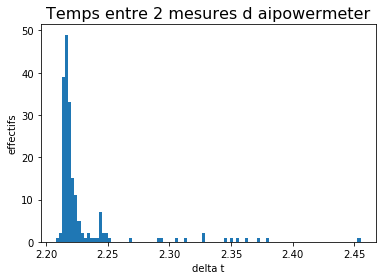

In [9]:
plt.title('Temps entre 2 mesures d aipowermeter', fontsize=16)
plt.hist(pd.Series(date_ts).diff(), bins=100)
plt.ylabel('effectifs')
plt.xlabel('delta t')
plt.show()

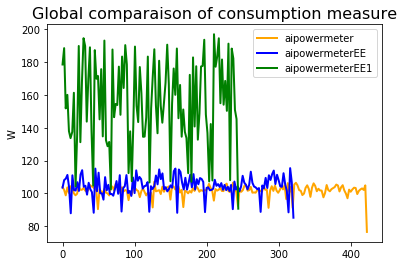

In [10]:
# fig, ax = plt.subplots(figsize=(16,9))
plt.title('Global comparaison of consumption measure', fontsize=16)
# plt.plot(watt.ts, watt.w, label='wattmetre')
# plt.plot(watt.ts, mean_average_watt, label='MA wattmetre', linewidth=2, color='#000062')
plt.plot(date_ts, aipowermeter_watt, label='aipowermeter', linewidth=2, color="orange")
plt.plot(date_ts_EE, aipowermeter_watt_EE, label='aipowermeterEE', linewidth=2, color="blue")
plt.plot(date_ts_EE1, aipowermeter_watt_EE1, label='aipowermeterEE1', linewidth=2, color="green")
plt.ylabel('W')
plt.legend()
plt.show()

## 3. Visualisation de l'énergie

In [11]:
df_EE = pd.DataFrame({
    'date': date_EE[:-1],
    'date_ts': date_ts_EE[:-1],
    'intel_power': integrate(date=date_EE, watt=intel_power_watt_EE),
    'total_cpu_power': integrate(date=date_EE, watt=total_cpu_power_EE),
    'nvidia_draw_absolute': integrate(date=date_EE, watt=nvidia_draw_absolute_EE), 
    'nvidia_estimated_attributable_power_draw': integrate(date=date_EE, watt=nvidia_estimated_attributable_power_draw_EE),
    'mem_use_abs': mem_use_abs_EE[:-1],
    'per_gpu_attributable_mem_use': per_gpu_attributable_mem_use_EE[:-1],
    'sm': sm_EE[:-1],
    'aipowermeter_watt': aipowermeter_watt_EE[:-1]
})
df_EE['total_power'] = df_EE.intel_power + df_EE.nvidia_draw_absolute

In [12]:
df_EE1 = pd.DataFrame({
    'date': date_EE1[:-1],
    'date_ts': date_ts_EE1[:-1],
    'intel_power': integrate(date=date_EE1, watt=intel_power_watt_EE1),
    'total_cpu_power': integrate(date=date_EE1, watt=total_cpu_power_EE1),
    'nvidia_draw_absolute': integrate(date=date_EE1, watt=nvidia_draw_absolute_EE1), 
    'nvidia_estimated_attributable_power_draw': integrate(date=date_EE1, watt=nvidia_estimated_attributable_power_draw_EE1),
    'mem_use_abs': mem_use_abs_EE1[:-1],
    'per_gpu_attributable_mem_use': per_gpu_attributable_mem_use_EE1[:-1],
    'sm': sm_EE1[:-1],
    'aipowermeter_watt': aipowermeter_watt_EE1[:-1]
})
df_EE1['total_power'] = df_EE1.intel_power + df_EE1.nvidia_draw_absolute

In [13]:
# le retrait de la première valeur est nécessaire car suite à l'intégration des données en watt, nous raisonnons en integrals et perdons donc une donnée.
df = pd.DataFrame({
    'date': date[:-1],
    'date_ts': date_ts[:-1],
    'intel_power': integrate(date=date, watt=intel_power_watt),
    'total_cpu_power': integrate(date=date, watt=total_cpu_power),
    'nvidia_draw_absolute': integrate(date=date, watt=nvidia_draw_absolute), 
    'nvidia_estimated_attributable_power_draw': integrate(date=date, watt=nvidia_estimated_attributable_power_draw),
    'mem_use_abs': mem_use_abs[:-1],
    'per_gpu_attributable_mem_use': per_gpu_attributable_mem_use[:-1],
    'sm': sm[:-1],
    'aipowermeter_watt': aipowermeter_watt[:-1]
})
df['total_power'] = df.intel_power + df.nvidia_draw_absolute

In [14]:
udf_EE = df_EE.groupby(by='date_ts').sum()
udf_EE['j'] = [0]+integrate(udf_EE.index.tolist(), udf_EE.aipowermeter_watt.tolist(), False)
udf_EE1 = df_EE1.groupby(by='date_ts').sum()
udf_EE1['j'] = [0]+integrate(udf_EE1.index.tolist(), udf_EE1.aipowermeter_watt.tolist(), False)
udf = df.groupby(by='date_ts').sum()
udf['j'] = [0]+integrate(udf.index.tolist(), udf.aipowermeter_watt.tolist(), False)

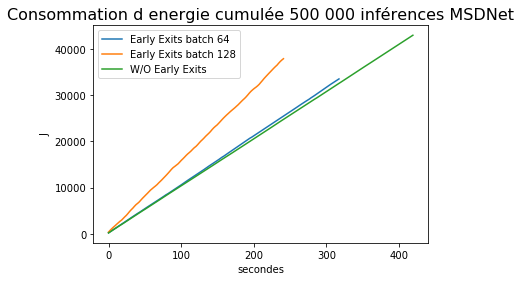

In [16]:
plt.title('Consommation d energie cumulée 500 000 inférences MSDNet', fontsize=16)
plt.plot(udf_EE.index, udf_EE.total_power.cumsum(), label='Early Exits batch 64')
plt.plot(udf_EE1.index, udf_EE1.total_power.cumsum(), label='Early Exits batch 128')
plt.plot(udf.index, udf.total_power.cumsum(), label='W/O Early Exits')
plt.legend()
plt.ylabel('J')
plt.xlabel('secondes')
plt.show()

In [107]:
print(
    f'''
Comparaison consommation total sur 500 000 inférences:
    Early Exits:      {sum(udf_EE.total_power):,.1f} J 
    W/O Early Exits:   {sum(udf.total_power):,.1f} J
    
    '''
)

print(
    f'''
Comparaison du temps de calcul sur 500 000 inférences:
    Early Exits:      {df_EE.date_ts.iloc[-1]} s 
    W/O Early Exits:   {df.date_ts.iloc[-1]} s
    
    '''
)



Comparaison consommation total sur 500 000 inférences:
    Early Exits:      33,473.4 J 
    W/O Early Exits:   42,901.9 J
    
    

Comparaison du temps de calcul sur 500 000 inférences:
    Early Exits:      317.32715702056885 s 
    W/O Early Exits:   419.09163093566895 s
    
    
188    2022-02-11 16:51:31.584292
Name: date, dtype: object
